# CHAPTER 5: Applied

### 5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table
from ISLP import load_data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm
import scipy.stats as st

In [2]:
credit_default = pd.read_csv('Credit Card Default Data.csv', index_col=0)
credit_default

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [3]:
X_train, X_test, y_train, y_test = train_test_split(credit_default , credit_default['default'], test_size = 0.25, random_state = 100)

#### (a)

In [4]:
X0=credit_default[['income','balance']]
X0=sm.add_constant(X0)
y0=credit_default.default== 'Yes'

In [5]:
glm = sm.GLM(y0,X0,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 03 May 2024   Deviance:                       1579.0
Time:                        20:53:42   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

#### (b)

In [6]:
X1_train=X_train[['income','balance']]
X1_train=sm.add_constant(X1_train)

X1_test=X_test[['income','balance']]
X1_test=sm.add_constant(X1_test)

y1_train=[]
y1_test=[]

for el in y_train:
    if el=="Yes":
        y1_train.append(1)
    elif el=="No":
        y1_train.append(0)

for el in y_test:
    if el=="Yes":
        y1_test.append(1)
    elif el=="No":
        y1_test.append(0)

In [7]:
glm = sm.GLM(y1_train,X1_train,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7497
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -584.94
Date:                Fri, 03 May 2024   Deviance:                       1169.9
Time:                        20:53:42   Pearson chi2:                 4.65e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1329
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8944      0.516    -23.064      0.000     -12.905     -10.884
income      2.358e-05   5.77e-06      4.085      0.000    1.23e-05    3.49e-05
balance        0.0058      0.000     21.714      0.000       0.005       0.006
==============================================================================
"""

In [8]:
probs = results.predict(exog=X1_test)
labels=[]
for el in probs:
    if el>0.5:
        labels.append("Yes")
    else:
        labels.append("No")

confusion_table(y_test, labels)

Truth,No,Yes
Predicted,,
No,2414,10
Yes,55,21


In [9]:
1-np.mean(labels == y_test)

0.026000000000000023

In [10]:
models_results=pd.DataFrame()
models_results['Model']=None
models_results['Test_error']=None
models_results.loc[len(models_results)] = ['Logistic regression (75.0%/25.0%)', 1-np.mean(labels == y_test)]

In [11]:
def test_models (percent):
    if percent <=1:
        pass
    else:
        percent=percent/100
    X_train, X_test, y_train, y_test = train_test_split(credit_default , credit_default['default'], test_size = percent, random_state = 100)
    X2_train=X_train[['income','balance']]
    X2_train=sm.add_constant(X2_train)
    
    X2_test=X_test[['income','balance']]
    X2_test=sm.add_constant(X2_test)


    y2_train=[]
    y2_test=[]
    
    for el in y_train:
        if el=="Yes":
            y2_train.append(1)
        elif el=="No":
            y2_train.append(0)
    
    for el in y_test:
        if el=="Yes":
            y2_test.append(1)
        elif el=="No":
            y2_test.append(0)

    glm = sm.GLM(y2_train,X2_train,family=sm.families.Binomial())
    results = glm.fit()
    results.summary()
    probs = results.predict(exog=X2_test)
    
    labels=[]
    for el in probs:
        if el>0.5:
            labels.append("Yes")
        else:
            labels.append("No")

    models_results.loc[len(models_results)] = [f'Logistic regression ({(1-percent)*100}%/{(percent)*100}%)', 1-np.mean(labels == y_test)]
    
    #return confusion_table(y_test, labels)
    #return np.mean(labels == y_test)

In [12]:
test_models(10)

In [13]:
test_models(30)

In [14]:
test_models(40)

In [15]:
models_results

,Model,Test_error
0,Logistic regression (75.0%/25.0%),0.0260
1,Logistic regression (90.0%/10.0%),0.0280
2,Logistic regression (70.0%/30.0%),0.0270
3,Logistic regression (60.0%/40.0%),0.0275


#### (c)

In [16]:
credit_default = pd.get_dummies(credit_default,columns=['student'], drop_first= True)
credit_default.head(2)

,default,balance,income,student_Yes
1,No,729.526495,44361.625074,0
2,No,817.180407,12106.134700,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(credit_default , credit_default['default'], test_size = 0.25, random_state = 100)
X3_train=X_train[['income','balance','student_Yes']]
X3_train=sm.add_constant(X3_train)

X3_test=X_test[['income','balance','student_Yes']]
X3_test=sm.add_constant(X3_test)

y3_train=[]
y3_test=[]

for el in y_train:
    if el=="Yes":
        y3_train.append(1)
    elif el=="No":
        y3_train.append(0)

for el in y_test:
    if el=="Yes":
        y3_test.append(1)
    elif el=="No":
        y3_test.append(0)

In [18]:
glm = sm.GLM(y3_train,X3_train,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7496
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -581.57
Date:                Fri, 03 May 2024   Deviance:                       1163.1
Time:                        20:53:43   Pearson chi2:                 4.89e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1336
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.1634      0.578    -19.317      0.000     -12.296     -10.031
income       4.184e-06   9.41e-06      0.444      0.657   -1.43e-05    2.26e-05
balance         0.0059      0.000     21.617      0.000       0.005       0.006
student_Yes    -0.7133      0.273     -2.611      0.009      -1.249      -0.178
===============================================================================
"""

In [19]:
probs = results.predict(exog=X3_test)
labels=[]
for el in probs:
    if el>0.5:
        labels.append("Yes")
    else:
        labels.append("No")

confusion_table(y_test, labels)

Truth,No,Yes
Predicted,,
No,2413,11
Yes,56,20


In [20]:
1-np.mean(labels == y_test)

0.026800000000000046

In [21]:
models_results.loc[len(models_results)] = ['Logistic regression + 1 predictor (75.0%/25.0%)', 1-np.mean(labels == y_test)]

In [22]:
models_results

,Model,Test_error
0,Logistic regression (75.0%/25.0%),0.0260
1,Logistic regression (90.0%/10.0%),0.0280
2,Logistic regression (70.0%/30.0%),0.0270
3,Logistic regression (60.0%/40.0%),0.0275
4,Logistic regression + 1 predictor (75.0%/25.0%),0.0268


**[ANSWER] Adding `student` predictor increased test error**

___

### 6.

#### (a)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(credit_default , credit_default['default'], test_size = 0.25, random_state = 100)
X0=credit_default[['income','balance']]
X0=sm.add_constant(X0)
y0=credit_default.default== 'Yes'
glm = sm.GLM(y0,X0,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 03 May 2024   Deviance:                       1579.0
Time:                        20:53:43   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

In [24]:
models_std_errors=pd.DataFrame()
models_std_errors['Model']=None
models_std_errors['Test_error_income']=None
models_std_errors['Test_error_balance']=None
models_std_errors.loc[len(models_std_errors)] = ['Logistic regression',results.bse[1],results.bse[1] ]
pd.set_option('max_colwidth', 400)

#### (b) + (c)

In [25]:
credit_default.reset_index(inplace=True, drop=True)
credit_default

,default,balance,income,student_Yes
0,No,729.526495,44361.625074,0
1,No,817.180407,12106.134700,1
2,No,1073.549164,31767.138947,0
3,No,529.250605,35704.493935,0
4,No,785.655883,38463.495879,0
...,...,...,...,...
9995,No,711.555020,52992.378914,0
9996,No,757.962918,19660.721768,0
9997,No,845.411989,58636.156984,0
9998,No,1569.009053,36669.112365,0


In [26]:
def boot_logit(D, idx):
    D_ = D.loc[idx]
    Y_ = D_.default== 'Yes'
    X_ = D_[['income','balance']]
    X_=sm.add_constant(X_)
    return sm.GLM(Y_,X_,family=sm.families.Binomial()).fit().params

In [27]:
def boot_fn(func, D, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    #return np.sqrt(second_ / B - (first_ / B)**2)
    res=np.sqrt(second_ / B - (first_ / B)**2)
    models_std_errors.loc[len(models_std_errors)] = ['Logistic regression with bootstrap',res[1],res[2] ]

In [28]:
boot_fn(boot_logit, credit_default, B=1000, seed=0)

#### (d)

In [29]:
models_std_errors

,Model,Test_error_income,Test_error_balance
0,Logistic regression,0.000005,0.000005
1,Logistic regression with bootstrap,0.000005,0.000230


**[ANSWER] Bootstrap standard errors are higher than `sm.GLM`**

___

### 7.

In [30]:
weekly = load_data('Weekly')
weekly.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


#### (a)

In [31]:
X=weekly[['Lag1','Lag2']]
X=sm.add_constant(X)
y = weekly.Direction == 'Up'
glm = sm.GLM(y,X,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Fri, 03 May 2024   Deviance:                       1488.2
Time:                        20:54:16   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

#### (b)

In [32]:
X1 = weekly.loc[weekly.index != 0, ["Lag1", "Lag2"]]
X1=sm.add_constant(X1)
y1 = weekly.Direction == 'Up'
y1 = y1.loc[weekly.index != 0]

In [33]:
glm1 = sm.GLM(y1,X1,family=sm.families.Binomial())
results1 = glm1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                            GLM   Df Residuals:                     1085
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.26
Date:                Fri, 03 May 2024   Deviance:                       1486.5
Time:                        20:54:16   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007373
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

#### (c)

In [34]:
X1_test=weekly.loc[1, ["Lag1", "Lag2"]].to_frame().T
X1_test=sm.add_constant(X1_test, has_constant='add')
X1_test["Lag1"]=pd.to_numeric(X1_test["Lag1"])
X1_test["Lag2"]=pd.to_numeric(X1_test["Lag1"])
probs = results1.predict(X1_test)
if probs[len(probs)] > 0.5:
    prediction = "Up"
else:
    prediction = "Down"
print(f'Real market movement is "{weekly.loc[0, "Direction"]}", predicted "{prediction}"')


Real market movement is "Down", predicted "Up"


**[ANSWER] There was wrong classification.**

#### (d)

In [35]:
predicted=[]
for i in range (weekly.shape[0]):
    X2 = weekly.loc[weekly.index != i, ["Lag1", "Lag2"]]
    X2 = sm.add_constant(X2)
    y2 = weekly.Direction == 'Up'
    y2 = y2.loc[weekly.index != i]
    glm2 = sm.GLM(y2,X2,family=sm.families.Binomial())
    results2 = glm2.fit()
    
    X2_test=weekly.loc[i, ["Lag1", "Lag2"]].to_frame().T
    X2_test=sm.add_constant(X2_test, has_constant='add')
    X2_test["Lag1"]=pd.to_numeric(X2_test["Lag1"])
    X2_test["Lag2"]=pd.to_numeric(X2_test["Lag1"])
    probs = results2.predict(X2_test)
    probs =probs.reset_index(drop=True)
    if  probs[0]>0.5:
        prediction = "Up"
    else:
        prediction = "Down"
    if prediction == weekly.loc[i, "Direction"]:
        predicted.append(1)
    else:
        predicted.append(0)

#### (e)

In [36]:
np.mean(predicted)

0.55188246097337

**[ANSWER] Classification was correct in 55.19% observations.**

___

### 8.

#### (a)

In [37]:
rng = np.random.default_rng(1)
X = rng.normal(size=100)
y = X - 2 * X**2 + rng.normal(size=100)

**[ANSWER] n=100 - number of observations, p=1 number of predictors (X)
$$y=X-2X^2 + ϵ$$**

#### (b)

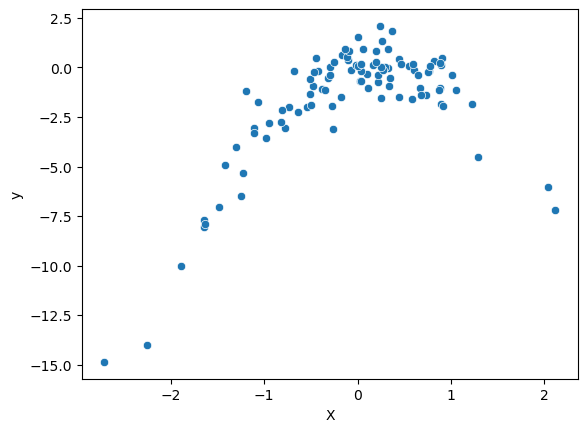

In [38]:
ax = sns.scatterplot(x=X,y=y)
ax.set(xlabel='X', ylabel='y')
plt.show()

**[ANSWER] Formula above and graph belong to quadratic function**

#### (c)

In [39]:
df=pd.DataFrame()
df['X']=X
df['y']=y

In [40]:
hp_model = sklearn_sm(sm.OLS,
                      MS(['X']))
X, Y = df.drop(columns=['y']), df['y']
cv_results = cross_validate(hp_model,
                            X,
                            Y,
                            cv=df.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

6.633029839181983

In [41]:
cv_error = np.zeros(4)
H = np.array(df['X'])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,5)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=df.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

#### (d)

**[ANSWER] I see no random seed involved in LOOCV as we are excluding one observation for run and making n iterations. So result wouldn't change at all.**

#### (e)

**[ANSWER] Quadratic function has smallest MSE as expected.**

#### (f)

In [42]:
model = smf.ols('y ~ X', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.04e-09
Time:                        20:54:29   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4650      0.247     -5.937      0.000      -1.955      -0.975
X              1.9494      0.289      6.752      0.000       1.376       2.522
==============================================================================
Omnibus:                       52.788   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.089
Skew:                          -1.953   Prob(JB):                     4.22e-33
Kurtosis:                       7.530   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] Linear model: the coefficient estimate is statistically significant at the 5% level** 

In [43]:
model2 = smf.ols('y ~ X + np.power(X,2)', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.36e-46
Time:                        20:54:29   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0728      0.119     -0.611      0.543      -0.309       0.164
X                  0.9663      0.126      7.647      0.000       0.715       1.217
np.power(X, 2)    -2.0047      0.091    -22.072      0.000      -2.185      -1.824
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] Quadratic model: the coefficient estimate is statistically significant at the 5% level. But intercept can be omitted. Let's update model accordingly.** 

In [44]:
model2 = smf.ols('y ~ X + np.power(X,2)-1', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              510.2
Date:                Fri, 03 May 2024   Prob (F-statistic):                    1.55e-52
Time:                        20:54:29   Log-Likelihood:                         -141.25
No. Observations:                 100   AIC:                                      286.5
Df Residuals:                      98   BIC:                                      291.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
X                  0.9571      0.125      7.653      0.000       0.709       1.205
np.power(X, 2)    -2.0341      0.077    -26.484      0.000      -2.186      -1.882
==============================================================================
Omnibus:                        1.876   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.319
Skew:                           0.158   Prob(JB):                        0.517
Kurtosis:                       3.465   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] Updated model R squared adj. is higher.** 

In [45]:
model3 = smf.ols('y ~ X + np.power(X,2) + np.power(X,3)', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     253.8
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.70e-45
Time:                        20:54:29   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0572      0.120     -0.477      0.635      -0.295       0.181
X                  1.1146      0.187      5.945      0.000       0.742       1.487
np.power(X, 2)    -2.0471      0.099    -20.673      0.000      -2.244      -1.851
np.power(X, 3)    -0.0643      0.060     -1.070      0.287      -0.184       0.055
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.392
Skew:                           0.052   Prob(JB):                        0.822
Kurtosis:                       3.289   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] Cubic model: the coefficient for x3 and intercept estimates are statistically insignificant at the 5% level. It's also confirmed by higher LOOCV error.** 

In [46]:
model4 = smf.ols('y ~ X + np.power(X,2) + np.power(X,3)+ np.power(X,4)', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.22e-45
Time:                        20:54:29   Log-Likelihood:                -137.74
No. Observations:                 100   AIC:                             285.5
Df Residuals:                      95   BIC:                             298.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1008      0.136      0.743      0.460      -0.169       0.370
X                  0.9050      0.205      4.423      0.000       0.499       1.311
np.power(X, 2)    -2.5059      0.221    -11.336      0.000      -2.945      -2.067
np.power(X, 3)     0.0338      0.073      0.466      0.642      -0.110       0.178
np.power(X, 4)     0.1042      0.045      2.309      0.023       0.015       0.194
==============================================================================
Omnibus:                        2.476   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.097
Skew:                           0.118   Prob(JB):                        0.351
Kurtosis:                       3.669   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**[ANSWER] Quartic model: the coefficient X4 and intercept estimates are statistically insignificant at the 5% level. It's also confirmed by higher LOOCV error.** 

___

### 9.

In [47]:
Boston = load_data("Boston")
Boston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


#### (a)

In [48]:
Boston['medv'].mean()

22.532806324110677

#### (b)

In [49]:
SE=Boston['medv'].std()/np.sqrt(Boston.shape[0])
SE

0.4088611474975351

#### (c)

In [50]:
def mean_func (idx):
   return Boston['medv'].loc[idx].mean()

In [51]:
def boot_SE(func,n=None,B=1000,seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or Boston.shape[0]
    for _ in range(B):
        idx = rng.choice(Boston.index,n,replace=True)
        value = func(idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

In [52]:
bootstrap_SE = boot_SE(mean_func,B=1000,seed=0)
bootstrap_SE

0.41253476750888246

**[ANSWER] Bootstrap SE is close to the previous estimation of SE** 

#### (d)

In [53]:
st.t.interval(0.95, Boston.shape[0]-1, loc=Boston['medv'].mean(), scale=st.sem(Boston['medv']))

(21.729528014578595, 23.33608463364276)

In [54]:
ci=[]
ci.append(Boston['medv'].mean()-2*bootstrap_SE)
ci.append(Boston['medv'].mean()+2*bootstrap_SE)
ci

[21.707736789092912, 23.35787585912844]

**[ANSWER] Confidence interval calculated as $$[ˆ µ − 2SE(ˆ µ), µˆ + 2SE(ˆ µ)]$$ gives wider interval than `scipy.stats`** 

#### (e)

In [55]:
Boston['medv'].median()

21.2

#### (f)

In [56]:
def median_func (idx):
   return Boston['medv'].loc[idx].median()

In [57]:
bootstrap_SE1 = boot_SE(median_func,B=1000,seed=0)
bootstrap_SE1

0.36944622071302163

#### (g)

In [58]:
np.percentile(Boston['medv'], 10)

12.75

#### (h)

In [59]:
def percentile_func (idx):
   return np.percentile(Boston['medv'].loc[idx], 10)

In [60]:
bootstrap_SE2 = boot_SE(percentile_func,B=1000,seed=0)
bootstrap_SE2

0.5034541091295026